In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep, strftime
import random
from random import randint
from selenium import webdriver
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cars = pd.DataFrame(columns = ['brand', 'model', 'price', 'fuel', 'transmission', 'km', 'year', 'location'])
df_cars.head()

,brand,model,price,fuel,transmission,km,year,location


In [25]:
for i in range(2022):
    
    sleep(randint(2,5))
    url = ('https://niw.es/es/coches-segunda-mano/marca/modelo/page{}'.format(i))
    response = requests.get(url,  headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, "html.parser")
    all_cars = soup.find_all(class_="column block vehicle-details")
    print(df_cars.shape)
    print('page',i)
    
    for i in range(len(all_cars)):
        car_brand = all_cars[i].find(class_='vehicle__title').text
        car_model = all_cars[i].find(class_='model-trim block').text
        price = all_cars[i].find(class_='vehicle__price').text.replace('\xa0€','').replace('.', '')
        fuel = all_cars[i].find(class_='vehicle__data').text.split('|')[0].strip()
        transmission = all_cars[i].find(class_='vehicle__data').text.split('|')[1].strip()
        
        try:
            km = all_cars[i].find(class_='vehicle__data').text.split('|')[2].replace('\xa0km', '').replace('.', '').strip()
            year = all_cars[i].find(class_='vehicle__data').text.split('|')[3].strip()
            location = all_cars[i].find(class_='vehicle__data').text.split('|')[4].strip()
            
        except:
            km = np.nan
            year = all_cars[i].find(class_='vehicle__data').text.split('|')[2].strip()
            location = all_cars[i].find(class_='vehicle__data').text.split('|')[3].strip()
            
        try:
        
            new_row = {
                'brand': car_brand,
                'model': car_model,
                'price': float(price),
                'fuel': fuel,
                'transmission': transmission,
                'km': float(km),
                'year': int(year),
                'location': location
            }
            
        except:
            
            new_row = {
                'brand': car_brand,
                'model': car_model,
                'price': float(price),
                'fuel': fuel,
                'transmission': transmission,
                'km': float(all_cars[i].find(class_='vehicle__data').text.split('|')[2].replace('\xa0km', '').replace('.', '').strip()),
                'year': np.nan,
                'location': location
            }
        
        df_cars = df_cars.append(new_row, ignore_index=True)

(29985, 8)
page 1999
(30000, 8)
page 2000
(30015, 8)
page 2001
(30030, 8)
page 2002
(30045, 8)
page 2003
(30060, 8)
page 2004
(30075, 8)
page 2005
(30090, 8)
page 2006
(30105, 8)
page 2007
(30120, 8)
page 2008
(30135, 8)
page 2009
(30150, 8)
page 2010
(30165, 8)
page 2011
(30180, 8)
page 2012
(30195, 8)
page 2013
(30210, 8)
page 2014
(30225, 8)
page 2015
(30240, 8)
page 2016
(30255, 8)
page 2017
(30270, 8)
page 2018
(30285, 8)
page 2019
(30300, 8)
page 2020
(30315, 8)
page 2021


In [26]:
df_cars.shape

(30326, 8)

In [38]:
os.getcwd()

'C:\\Users\\David Sagrario\\Bootcamp Data Science\\DAT_project'

In [40]:
df_cars.to_csv(r'C:\\Users\\David Sagrario\\Bootcamp Data Science\\DAT_project\\niw_cars.csv', index = False)

In [77]:
df_cars = pd.read_csv('niw_cars.csv')

In [78]:
df_cars[df_cars.duplicated(keep=False)].shape

(5870, 8)

In [79]:
df_cars.drop_duplicates(keep='first', inplace = True, ignore_index = True)

In [80]:
df_cars.shape

(26308, 8)

In [81]:
df_cars.isnull().sum()

brand             0
model             0
price             0
fuel              0
transmission      0
km              132
year              1
location          0
dtype: int64

In [82]:
from collections import Counter

In [83]:
Counter(df_cars['brand'])

Counter({'Renault': 2325,
         'Volkswagen': 2523,
         'Hyundai': 1002,
         'Nissan': 1309,
         'Cupra': 27,
         'Ford': 1737,
         'Seat': 1993,
         'Dacia': 109,
         'Land Rover': 202,
         'BMW': 1448,
         'Volvo': 671,
         'Peugeot': 1145,
         'Kia': 860,
         'Opel': 1489,
         'Citroen': 784,
         'MINI': 449,
         'Audi': 2366,
         'Fiat': 807,
         'Subaru': 25,
         'Mazda': 179,
         'DS': 72,
         'Honda': 136,
         'Skoda': 467,
         'Abarth': 39,
         'Bentley': 9,
         'Mercedes-Benz': 2021,
         'Toyota': 854,
         'Jeep': 266,
         'Mitsubishi': 97,
         'Suzuki': 109,
         'Smart': 146,
         'Lexus': 211,
         'Alfa Romeo': 108,
         'Infiniti': 15,
         'Jaguar': 146,
         'Maserati': 20,
         'Porsche': 71,
         'Tesla': 2,
         'SsangYong': 54,
         'DFSK': 2,
         'Drexel': 1,
         'Ferrari': 4

In [84]:
Counter(df_cars['price'])

Counter({14500.0: 177,
         42490.0: 5,
         16300.0: 52,
         22400.0: 32,
         36900.0: 94,
         32990.0: 38,
         17200.0: 58,
         14000.0: 21,
         22500.0: 162,
         12900.0: 257,
         16500.0: 217,
         29990.0: 68,
         18900.0: 323,
         16650.0: 4,
         37890.0: 3,
         53900.0: 8,
         36000.0: 16,
         36890.0: 1,
         30900.0: 125,
         44900.0: 60,
         32500.0: 62,
         41900.0: 63,
         46500.0: 17,
         35900.0: 103,
         28900.0: 202,
         9990.0: 70,
         14750.0: 14,
         13850.0: 12,
         26790.0: 5,
         23000.0: 41,
         16990.0: 185,
         28200.0: 14,
         17900.0: 351,
         12750.0: 8,
         24990.0: 108,
         28990.0: 68,
         17990.0: 164,
         23900.0: 258,
         26500.0: 133,
         16950.0: 33,
         11500.0: 149,
         17500.0: 199,
         14900.0: 282,
         17490.0: 65,
         12990.0: 97,
 

In [85]:
Counter(df_cars['fuel'])

Counter({'Diésel': 10844,
         'Gasolina': 11925,
         'Híbrido': 2014,
         'Eléctrico': 1307,
         'Gas': 82,
         'Gas natural (CNG)': 130,
         'Automático': 6})

In [86]:
df_cars[df_cars['fuel'] == 'Automático']

,brand,model,price,fuel,transmission,km,year,location
5065,Audi,Q7 3.0 TDI E-TRON QUATTRO TIPTRONIC DESIGN 4X4...,51490.0,Automático,68.496 km,NaN,2016.0,Madrid
5066,BMW,X5 40 E XDRIVE 4X4 HYBRID,37990.0,Automático,52.874 km,NaN,2016.0,Madrid
15477,Kia,Niro Drive,25900.0,Automático,3.316 km,NaN,2020.0,Cádiz
15478,Kia,XCeed Tech,23900.0,Automático,13.100 km,NaN,2020.0,Cádiz
24435,Audi,A3 e-tron A-3 SPORTBACK 40 S LINE STRONIC,32900.0,Automático,1.500 km,NaN,2019.0,Tarragona
25816,Mercedes-Benz,ASE E 300 e BERLINA,55400.0,Automático,3.333 km,NaN,2019.0,Córdoba


In [87]:
fuel_error = list(df_cars[df_cars['fuel'] == 'Automático'].index)

In [88]:
for i in fuel_error:
    df_cars['km'].iloc[i] = float(df_cars['transmission'].iloc[i].strip('\xa0km').replace('.',''))
    df_cars['transmission'].iloc[i] = df_cars['fuel'].iloc[i]
    df_cars['fuel'].iloc[i] = 'Híbrido'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [89]:
for i in fuel_error:
    print(df_cars['km'].iloc[i])
    print(df_cars['transmission'].iloc[i])
    print(df_cars['fuel'].iloc[i])

68496.0
Automático
Híbrido
52874.0
Automático
Híbrido
3316.0
Automático
Híbrido
13100.0
Automático
Híbrido
1500.0
Automático
Híbrido
3333.0
Automático
Híbrido


In [90]:
df_cars[df_cars.year.isnull()]

,brand,model,price,fuel,transmission,km,year,location
7426,Kia,Ceed Tourer 1.6 PHEV Tech (MY21),28800.0,Híbrido,Automático,1.0,NaN,Cádiz


In [91]:
df_cars['year'].iloc[7426] = 2021

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [92]:
df_cars[df_cars.duplicated(subset='model')].sort_values(by = 'model')

,brand,model,price,fuel,transmission,km,year,location
3259,Mercedes-Benz,,58890.0,Diésel,Automático,10000.0,2020.0,Guipúzcoa
15691,Seat,,17500.0,Diésel,Manual,12648.0,2019.0,Navarra
15273,Seat,,17500.0,Diésel,Manual,11241.0,2019.0,Navarra
21712,Volkswagen,,13999.0,Diésel,Manual,121000.0,2017.0,Navarra
14549,Seat,,17500.0,Gasolina,Manual,11684.0,2019.0,Navarra
...,...,...,...,...,...,...,...,...
21363,Peugeot,iOn iOn 49 kW (67 CV),18990.0,Eléctrico,Automático,10.0,2020.0,Toledo
19215,Hyundai,ix20 1.4 MPI BlueDrive 25 Aniversario 66 kW (9...,12890.0,Gasolina,Manual,18010.0,2018.0,Madrid
20532,Hyundai,ix20 1.6 MPI Tecno 93 kW (126 CV),13700.0,Gasolina,Manual,7214.0,2019.0,Barcelona
19748,Smart,smart 81cv electric drive,17900.0,Eléctrico,Automático,2929.0,2018.0,Baleares


In [93]:
df_cars[df_cars.model == ' ']

,brand,model,price,fuel,transmission,km,year,location
2947,Mercedes-Benz,,41900.0,Gasolina,Automático,500.0,2021.0,Guipúzcoa
3259,Mercedes-Benz,,58890.0,Diésel,Automático,10000.0,2020.0,Guipúzcoa
14426,Seat,,17500.0,Diésel,Manual,9060.0,2019.0,Navarra
14542,Seat,,17500.0,Diésel,Manual,27000.0,2019.0,Navarra
14549,Seat,,17500.0,Gasolina,Manual,11684.0,2019.0,Navarra
15273,Seat,,17500.0,Diésel,Manual,11241.0,2019.0,Navarra
15691,Seat,,17500.0,Diésel,Manual,12648.0,2019.0,Navarra
21712,Volkswagen,,13999.0,Diésel,Manual,121000.0,2017.0,Navarra


In [94]:
model_error = list(df_cars[df_cars.model == ' '].index)

In [96]:
df_cars['model'].iloc[model_error[0]] = 'Clase C 200 4p. - Híbrido'
df_cars['model'].iloc[model_error[1]] = 'Clase V 250 d Avantgarde Largo 5p.'
df_cars['model'].iloc[model_error[2]] = 'Seat LEON 1.6 TDI 85kW (115CV) S&S Style Visio Ed'
df_cars['model'].iloc[model_error[3]] = 'Seat LEON 1.6 TDI 85kW (115CV) S&S Style Visio Ed'
df_cars['model'].iloc[model_error[4]] = 'Seat LEON 1.6 TDI 85kW (115CV) St&Sp Style'
df_cars['model'].iloc[model_error[5]] = 'Seat LEON 1.6 TDI 85kW (115CV) St&Sp Style'
df_cars['model'].iloc[model_error[6]] = 'Seat LEON 1.6 TDI 85kW (115CV) S&S Style Visio Ed'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [97]:
df_cars[df_cars.model == ' ']

,brand,model,price,fuel,transmission,km,year,location
21712,Volkswagen,,13999.0,Diésel,Manual,121000.0,2017.0,Navarra


In [98]:
df_cars[df_cars.km.isnull()]

,brand,model,price,fuel,transmission,km,year,location
176,Mercedes-Benz,CLA 220 D DCT Shooting Brake,47600.0,Diésel,Automático,NaN,2021.0,Sevilla
178,Mercedes-Benz,CLA 200 Shooting Brake Shooting Brake,39700.0,Gasolina,Automático,NaN,2021.0,Sevilla
1340,Mercedes-Benz,GLE 300 d 4MATIC,78500.0,Diésel,Automático,NaN,2021.0,Sevilla
1341,Mercedes-Benz,CLA 200,39700.0,Gasolina,Automático,NaN,2021.0,Sevilla
1342,Mercedes-Benz,A 200 d,39700.0,Diésel,Automático,NaN,2021.0,Sevilla
...,...,...,...,...,...,...,...,...
24648,Volvo,V60 V60 D3 Momentum Automático,27500.0,Diésel,Automático,NaN,2019.0,Albacete
24914,Ford,Fiesta 1.1 PFI GLP 55kW 75CV STLine,16970.0,Gas,Manual,NaN,2019.0,Madrid
25079,Land Rover,Range Rover Sport 3.0 SDV6 183kW 249CV HSE,91690.0,Diésel,Automático,NaN,2019.0,Barcelona
25198,Jaguar,XE 2.0D I4 132kW 180CV AWD AT RDynamic S,58890.0,Diésel,Automático,NaN,2020.0,Barcelona


In [99]:
Counter(df_cars['location'])

Counter({'Alava': 262,
         'Madrid': 4848,
         'Barcelona': 4205,
         'Soria': 11,
         'Valencia': 1240,
         'Burgos': 296,
         'Vizcaya': 371,
         'Zamora': 56,
         'Córdoba': 943,
         'Cádiz': 652,
         'Murcia': 670,
         'Málaga': 1925,
         'Almería': 862,
         'Granada': 693,
         'Alicante': 637,
         'Baleares': 979,
         'Gerona': 289,
         'Jaén': 280,
         'Sevilla': 1110,
         'Navarra': 168,
         'Pontevedra': 638,
         'La Coruña': 677,
         'Palencia': 53,
         'La Rioja': 127,
         'Albacete': 150,
         'Tarragona': 601,
         'Huesca': 172,
         'Huelva': 117,
         'Lugo': 191,
         'Asturias': 585,
         'Guipúzcoa': 415,
         'Castellón': 153,
         'León': 70,
         'Ávila': 152,
         'Badajoz': 88,
         'Toledo': 485,
         'Cáceres': 93,
         'Valladolid': 116,
         'Zaragoza': 314,
         'Cantabria': 99,
  

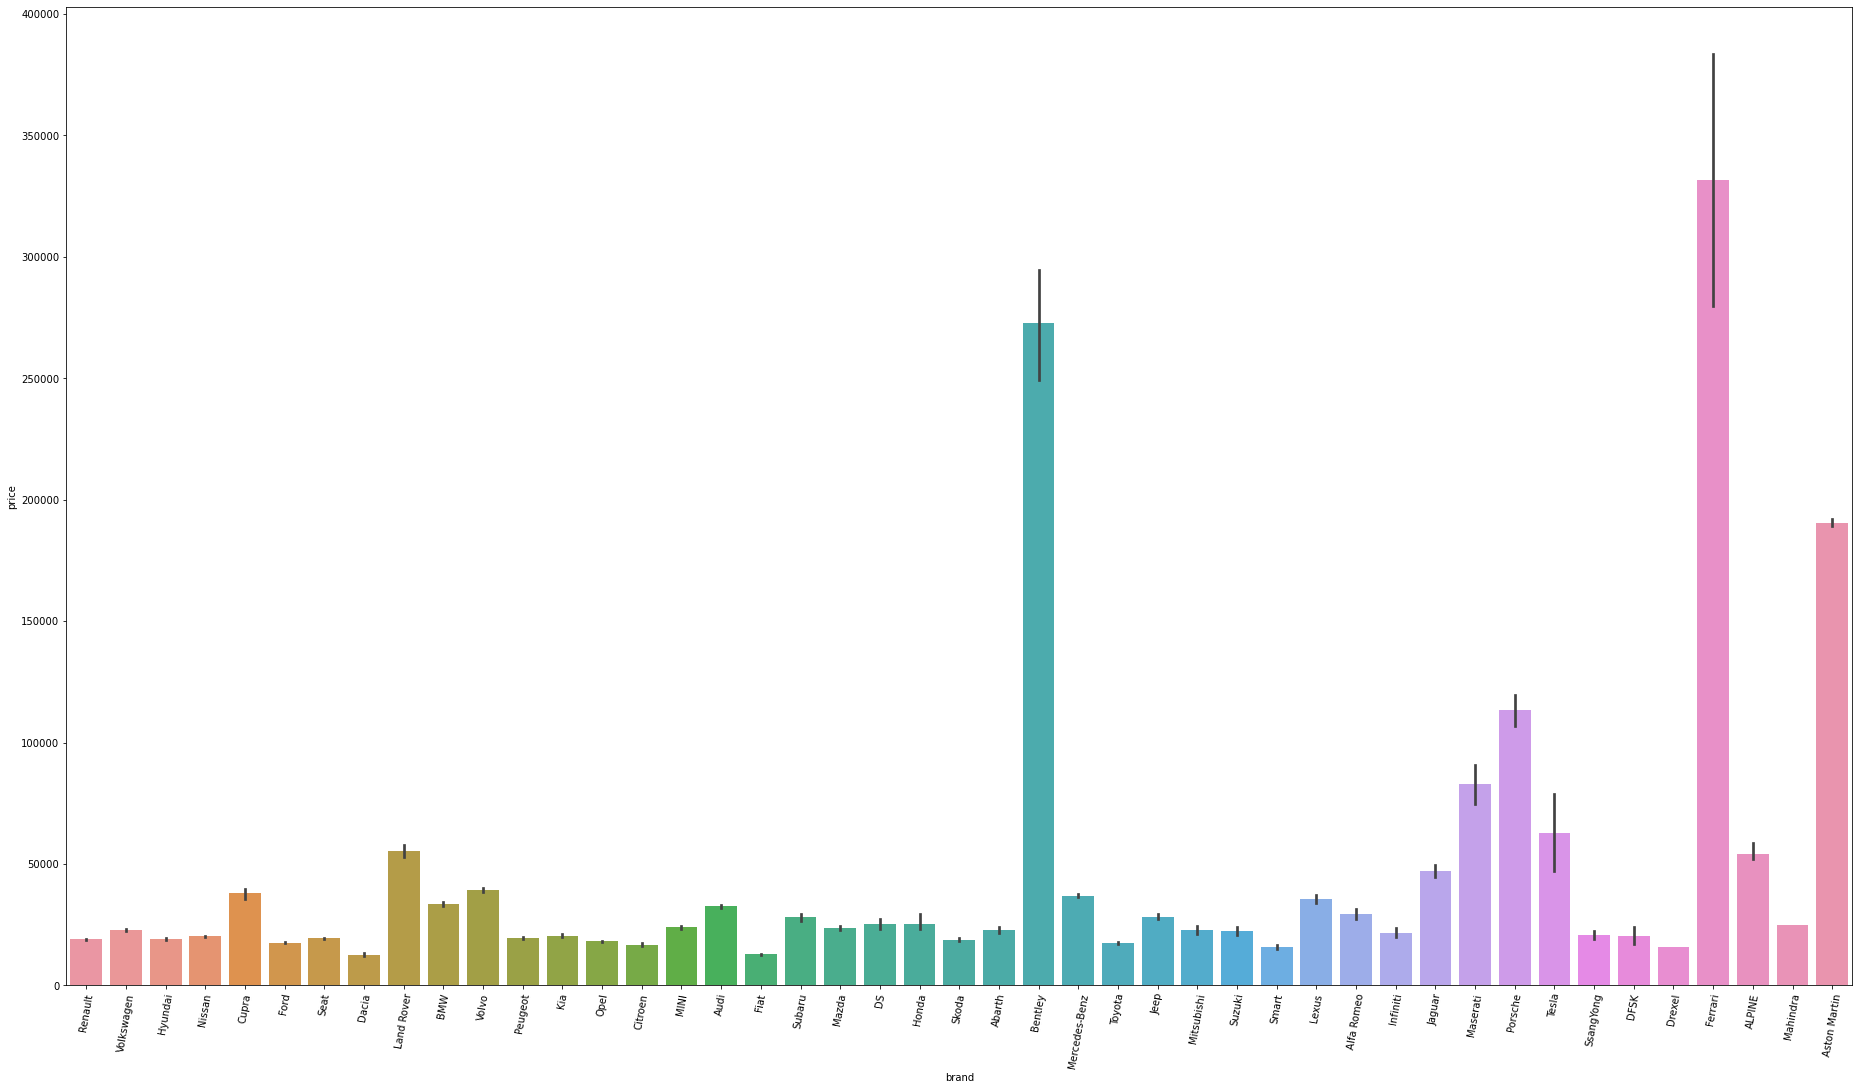

In [100]:
fig, ax = plt.subplots (figsize = (32,18))
brands = sns.barplot(x="brand", y="price", data=df_cars)
for item in brands.get_xticklabels():
    item.set_rotation(80)
plt.show()

<AxesSubplot:>

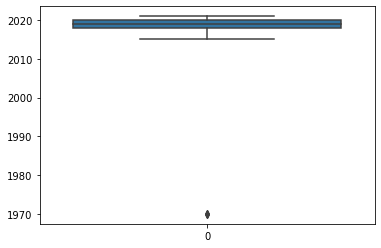

In [101]:
sns.boxplot(data=df_cars.year)

In [102]:
df_cars.year.unique()

array([2017., 2020., 2018., 2019., 2021., 2016., 2015., 1970.])

In [103]:
df_cars[df_cars['year'] == 1970]

,brand,model,price,fuel,transmission,km,year,location
18825,Kia,Sportage 1.6 MHEV Drive 85kW (115CV) 4x2,26995.0,Eléctrico,Manual,1.0,1970.0,Barcelona
20906,Smart,fortwo 60kW(81CV) EQ coupe,26550.0,Eléctrico,Automático,1.0,1970.0,Barcelona
24517,Kia,Sportage 1.6 MHEV 85KW CONCEPT 2WD 115 5P,24965.0,Eléctrico,Manual,1.0,1970.0,Málaga


In [104]:
year_error = list(df_cars[df_cars.year == 1970].index)

In [105]:
for i in year_error:
    df_cars['year'].iloc[i] = 2020

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:>

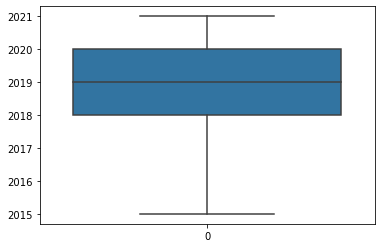

In [106]:
sns.boxplot(data=df_cars.year)

<AxesSubplot:>

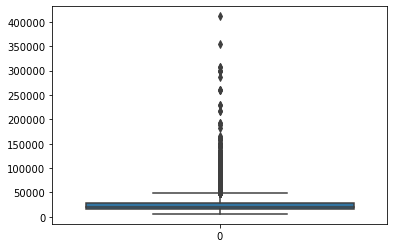

In [107]:
sns.boxplot(data=df_cars.price)

In [108]:
df_cars[df_cars['price']>50000]

,brand,model,price,fuel,transmission,km,year,location
15,Land Rover,Range Rover Sport 3.0 TDV6 HSE AUTO 4WD 258 5P,53900.0,Diésel,Automático,39189.0,2018.0,Córdoba
85,Land Rover,Range Rover 3.0 SDV6 202kW (275CV) VOGUE,102455.0,Diésel,Automático,5.0,2020.0,Málaga
88,Land Rover,Range Rover 3.0 SDV6 202kW (275CV) VOGUE,102455.0,Diésel,Automático,5.0,2020.0,Almería
107,Land Rover,Range Rover 3.0 SDV6 202kW (275CV) VOGUE,102455.0,Diésel,Automático,5.0,2020.0,Granada
118,BMW,X5 xDrive40i 250 kW (340 CV),64900.0,Gasolina,Automático,40003.0,2018.0,Alicante
...,...,...,...,...,...,...,...,...
26223,Mercedes-Benz,GLS 350 AMG,63900.0,Diésel,Automático,77100.0,2016.0,Zaragoza
26227,Land Rover,Range Rover Sport 3.0 SDV6 249 CV HSE 7 asientos,69996.0,Diésel,Automático,6480.0,2019.0,Madrid
26257,Land Rover,Range Rover Sport 2.0P Si4 PHEV 404 CV HSE,79998.0,Híbrido,Automático,4520.0,2019.0,Madrid
26258,Jaguar,I-Pace EV 400 CV AWD HSE,65995.0,Eléctrico,Automático,15742.0,2018.0,Madrid


In [109]:
df_cars[df_cars['price']>300000]

,brand,model,price,fuel,transmission,km,year,location
172,Bentley,Continental GT GT V8 Convertible,307900.0,Gasolina,Automático,50.0,2021.0,Madrid
5211,Bentley,Continental GT GT V8 Convertible,307900.0,Gasolina,Automático,50.0,2021.0,Málaga
11966,Ferrari,SPIDER,411730.0,Gasolina,Automático,55.0,2020.0,Málaga
23186,Ferrari,812 Superfast,355000.0,Gasolina,Automático,1800.0,2019.0,Málaga


In [110]:
df_cars.groupby('brand', axis = 0).describe()

price                                                    \
                count           mean           std       min        25%   
brand                                                                     
ALPINE            4.0   54150.000000   4500.000000   51900.0   51900.00   
Abarth           39.0   22899.743590   4431.923360   13900.0   19600.00   
Alfa Romeo      108.0   29495.925926  11294.042598    8500.0   19650.00   
Aston Martin      2.0  190500.000000   2121.320344  189000.0  189750.00   
Audi           2366.0   32563.760778  13140.855757   11900.0   23990.00   
BMW            1448.0   33549.354972  15870.818555   12490.0   23500.00   
Bentley           9.0  272786.666667  36543.391673  216750.0  259900.00   
Citroen         784.0   16819.917092   8463.840134    7000.0   13400.00   
Cupra            27.0   37961.296296   5613.931433   29900.0   34900.00   
DFSK              2.0   20495.000000   4942.676400   17000.0   18747.50   
DS               72.0   25398.666667   9524.324666    8600.0   16900.00   
Dacia           109.0   12668.935780   3307.487959    6750.0    9900.00   
Drexel            1.0   15900.000000           NaN   15900.0   15900.00   
Ferrari           4.0  331586.250000  66126.082521  260000.0  289711.25   
Fiat            807.0   12844.246592   4074.751428    6500.0   10250.00   
Ford           1737.0   17647.805412   7651.701994    6900.0   12180.00   
Honda           136.0   25491.786765  18840.679608   10900.0   19200.00   
Hyundai        1002.0   19145.372255   7350.847357    6990.0   13890.00   
Infiniti         15.0   21533.333333   3976.415591   17900.0   17945.00   
Jaguar          146.0   47130.842466  14999.602067   17900.0   36516.00   
Jeep            266.0   28318.097744   8617.361941   12900.0   22425.00   
Kia             860.0   20480.045349   9935.200271    7000.0   15690.00   
Land Rover      202.0   55377.381188  18738.746360   22500.0   41900.00   
Lexus           211.0   35497.199052  12999.789774   12900.0   27875.00   
MINI            449.0   23947.824053   6687.018079   13200.0   18550.00   
Mahindra          2.0   24900.000000      0.000000   24900.0   24900.00   
Maserati         20.0   82915.000000  17188.223478   59000.0   67850.00   
Mazda           179.0   23666.877095   5885.037777   11800.0   18242.50   
Mercedes-Benz  2021.0   36885.400792  15121.811880    8230.0   27795.00   
Mitsubishi       97.0   22857.618557   8712.589204    7900.0   13900.00   
Nissan         1309.0   20209.128342   5925.524913    7900.0   15700.00   
Opel           1489.0   18157.885829   6344.757323    7100.0   14900.00   
Peugeot        1145.0   19580.075109   7175.107248    6990.0   13900.00   
Porsche          71.0  113360.422535  27002.013652   50900.0   95445.00   
Renault        2325.0   19090.623656   5720.579010    5850.0   15050.00   
Seat           1993.0   19414.081284   5837.474768    6300.0   15900.00   
Skoda           467.0   18874.755889   7055.698303    6450.0   13490.00   
Smart           146.0   15776.726027   4666.818979    7900.0   12525.00   
SsangYong        54.0   20785.888889   5735.135545   11600.0   18092.50   
Subaru           25.0   28066.600000   3872.178736   21900.0   23900.00   
Suzuki          109.0   22341.477064   9214.434938    9300.0   16200.00   
Tesla             2.0   62945.000000  22563.777388   46990.0   54967.50   
Toyota          854.0   17427.614754   5799.721810    6900.0   13400.00   
Volkswagen     2523.0   22912.172810   8748.214572    7900.0   16900.00   
Volvo           671.0   39161.992548  12376.959273   12900.0   32750.00   

                                                  km                ...  \
                    50%        75%       max   count          mean  ...   
brand                                                               ...   
ALPINE          51900.0   54150.00   60900.0     4.0  44855.000000  ...   
Abarth          23990.0   26545.00   29800.0    39.0  10906.897436  ...   
Alfa Romeo      29950.0   41050.00   475

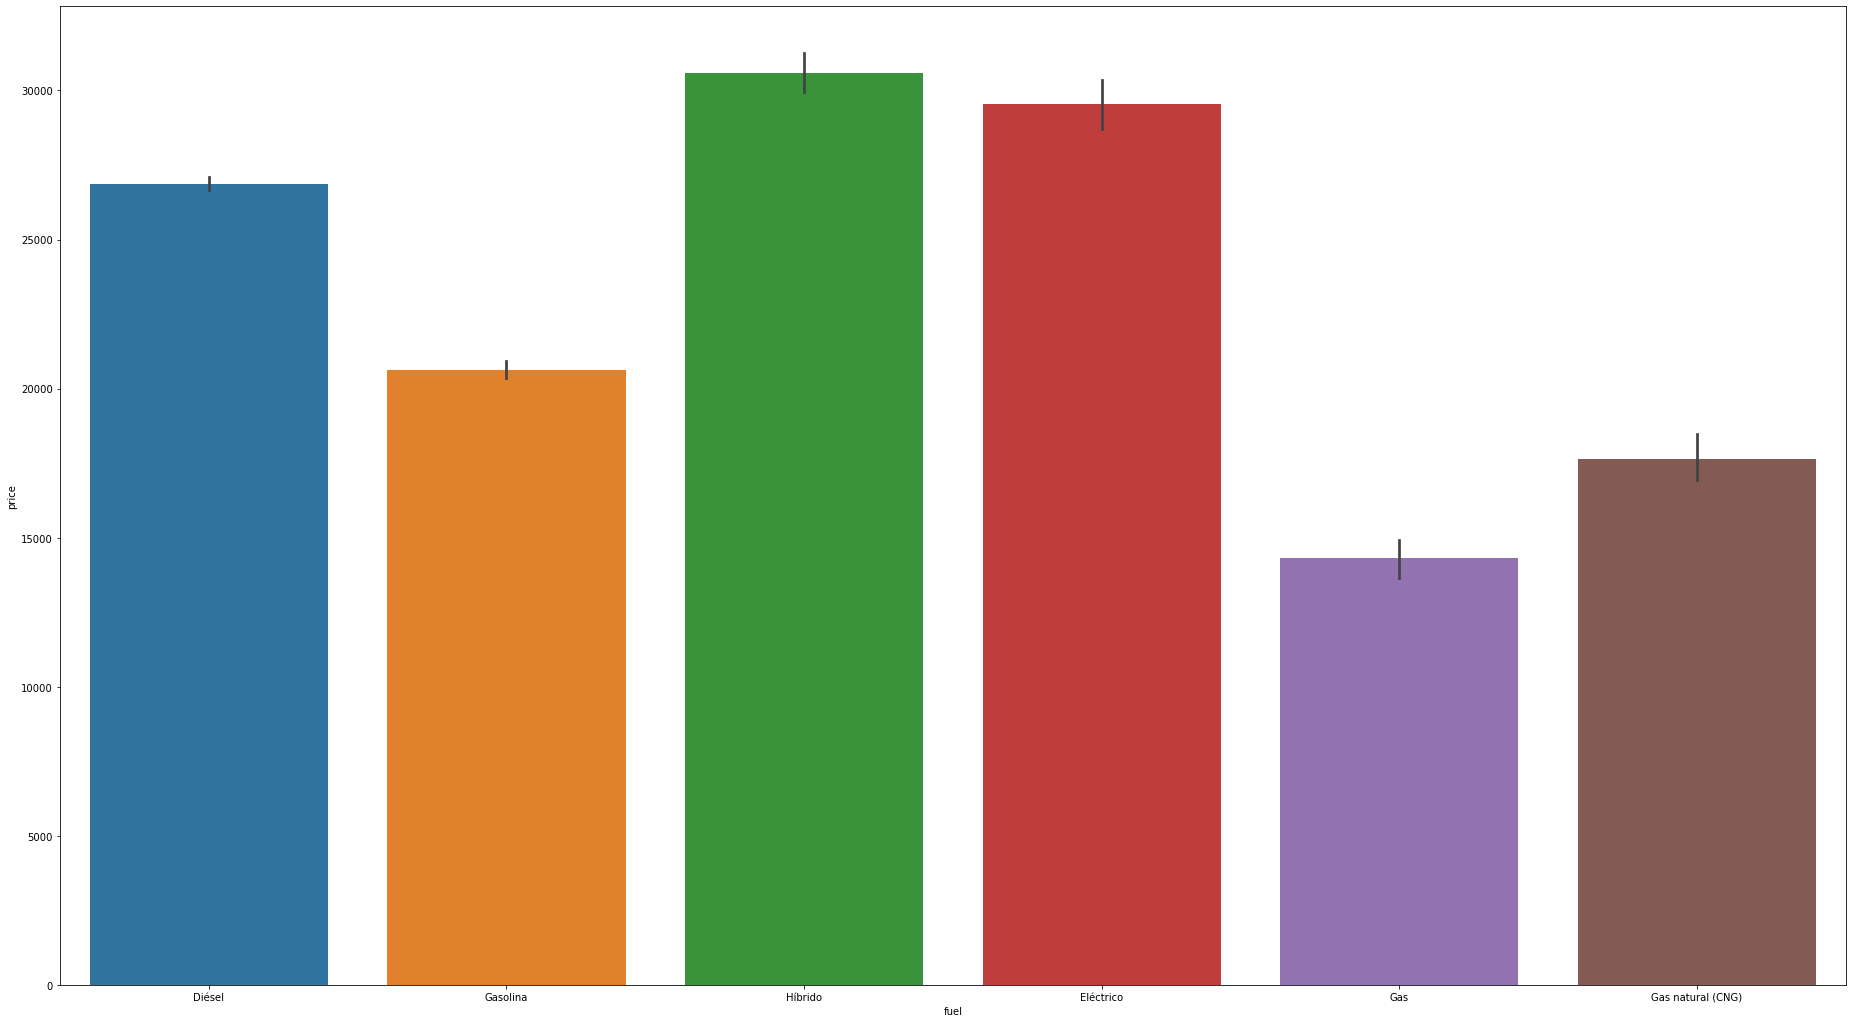

In [111]:
fig, ax = plt.subplots (figsize = (32,18))
brands = sns.barplot(x="fuel", y="price", data=df_cars)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


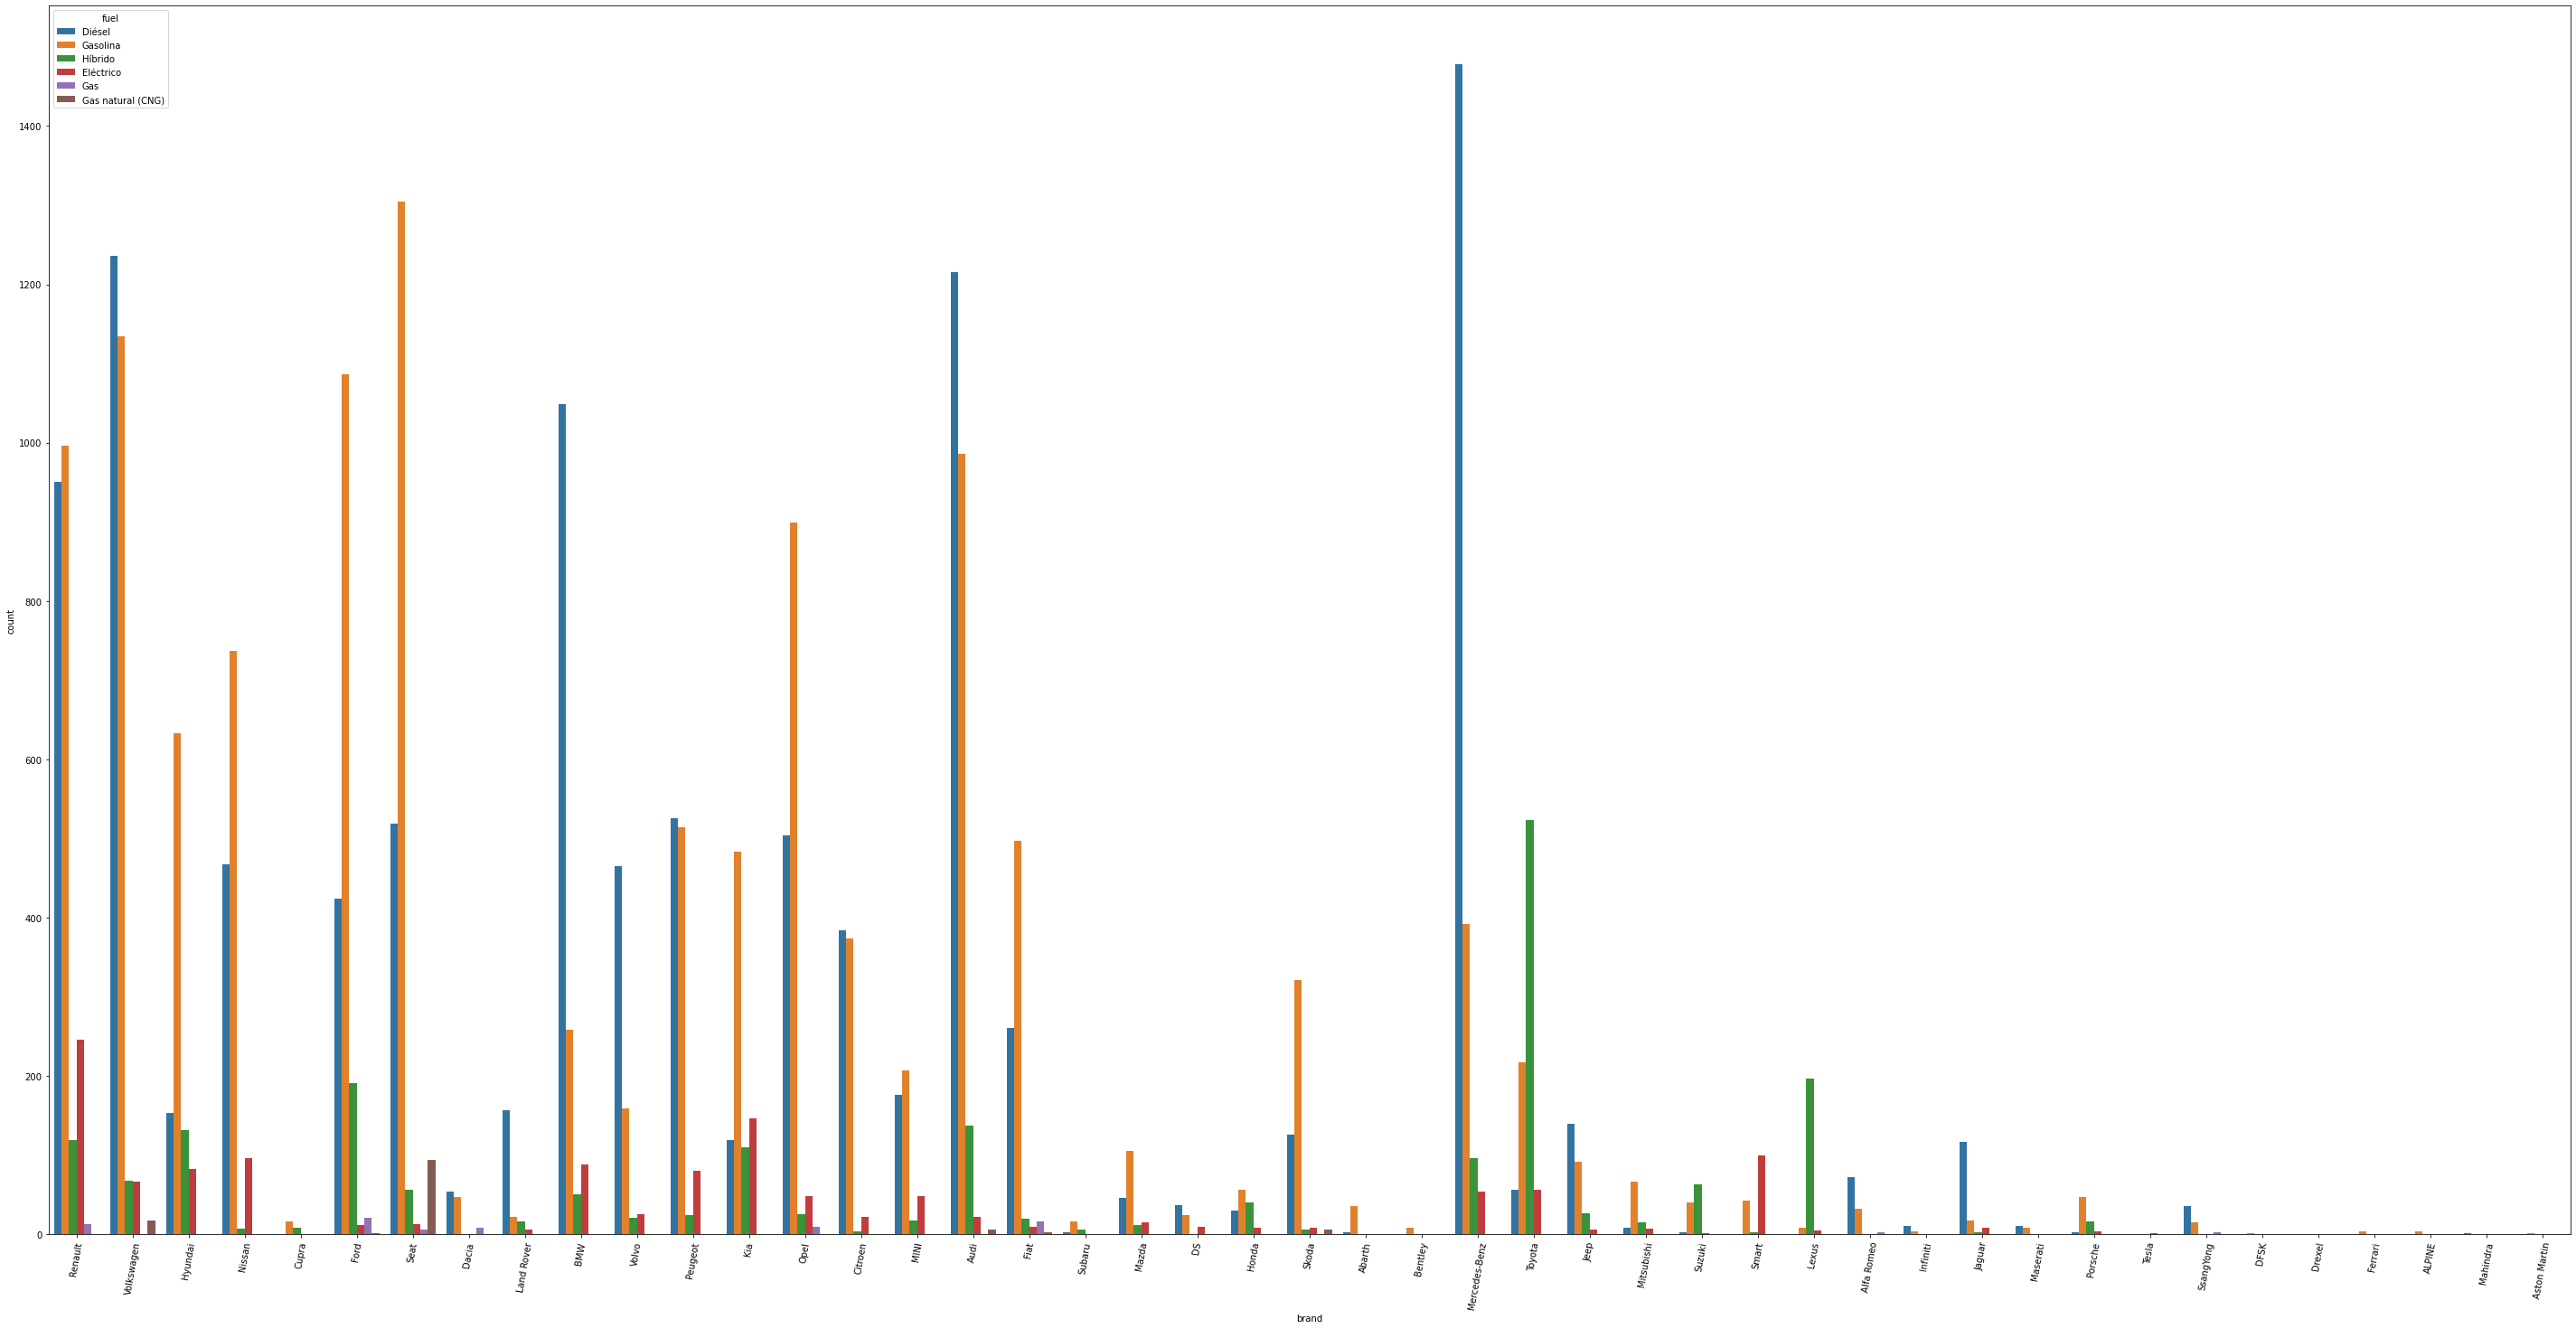

In [112]:
fig, ax = plt.subplots (figsize = (50,25))
fuels = sns.countplot(df_cars['brand'], hue = df_cars['fuel'])
for item in fuels.get_xticklabels():
    item.set_rotation(80)
plt.show()

In [113]:
fuel_dum = pd.get_dummies(df_cars.fuel, drop_first = True)
brand_dum = pd.get_dummies(df_cars.brand, drop_first = True)

In [114]:
df_cars = pd.concat([df_cars, fuel_dum], axis = 1)

In [115]:
df_cars = pd.concat([df_cars, brand_dum], axis = 1)

In [116]:
df_cars.shape

(26308, 57)

In [117]:
df_cars.drop('fuel', axis = 1, inplace = True)

<AxesSubplot:>

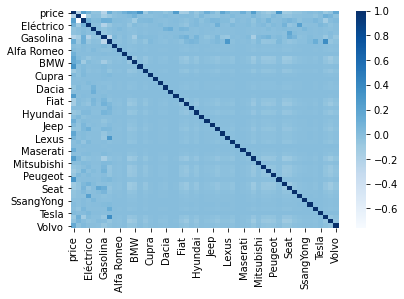

In [118]:
sns.heatmap(df_cars.corr(), cmap = 'Blues')

In [119]:
keys = list(df_cars['brand'].unique()) 
values = [i for i in range(45)]

In [120]:
df_cars['bmap'] = df_cars['brand'].map({'Renault': 0,
                                         'Volkswagen': 1,
                                         'Hyundai': 2,
                                         'Nissan': 3,
                                         'Cupra': 4,
                                         'Ford': 5,
                                         'Seat': 6,
                                         'Dacia': 7,
                                         'Land Rover': 8,
                                         'BMW': 9,
                                         'Volvo': 10,
                                         'Peugeot': 11,
                                         'Kia': 12,
                                         'Opel': 13,
                                         'Citroen': 14,
                                         'MINI': 15,
                                         'Audi': 16,
                                         'Fiat': 17,
                                         'Subaru': 18,
                                         'Mazda': 19,
                                         'DS': 20,
                                         'Honda': 21,
                                         'Skoda': 22,
                                         'Abarth': 23,
                                         'Bentley': 24,
                                         'Mercedes-Benz': 25,
                                         'Toyota': 26,
                                         'Jeep': 27,
                                         'Mitsubishi': 28,
                                         'Suzuki': 29,
                                         'Smart': 30,
                                         'Lexus': 31,
                                         'Alfa Romeo': 32,
                                         'Infiniti': 33,
                                         'Jaguar': 34,
                                         'Maserati': 35,
                                         'Porsche': 36,
                                         'Tesla': 37,
                                         'SsangYong': 38,
                                         'DFSK': 39,
                                         'Drexel': 40,
                                         'Ferrari': 41,
                                         'ALPINE': 42,
                                         'Mahindra': 43,
                                         'Aston Martin': 44})

<AxesSubplot:>

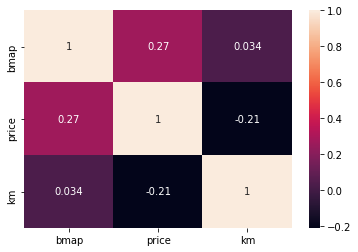

In [121]:
sns.heatmap(df_cars[["bmap","price","km"]].corr(), annot = True)